<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки-применив-параметр-class_weight-=-'balanced'" data-toc-modified-id="Увеличение-выборки-применив-параметр-class_weight-=-'balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки применив параметр class_weight = 'balanced'</a></span><ul class="toc-item"><li><span><a href="#Применение-параметра-class_weight-=-'balanced'-на-LogisticRegression" data-toc-modified-id="Применение-параметра-class_weight-=-'balanced'-на-LogisticRegression-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Применение параметра class_weight = 'balanced' на LogisticRegression</a></span></li><li><span><a href="#Применение-параметра-class_weight-=-'balanced'-на-RandomForestClassifier" data-toc-modified-id="Применение-параметра-class_weight-=-'balanced'-на-RandomForestClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Применение параметра class_weight = 'balanced' на RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Увеличение-выборки-методом-upsampling" data-toc-modified-id="Увеличение-выборки-методом-upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки методом upsampling</a></span><ul class="toc-item"><li><span><a href="#Применение-метода-upsampling-на-LogisticRegression" data-toc-modified-id="Применение-метода-upsampling-на-LogisticRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Применение метода upsampling на LogisticRegression</a></span></li><li><span><a href="#Применение-метода-upsampling-на-RandomForestClassifier" data-toc-modified-id="Применение-метода-upsampling-на-RandomForestClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Применение метода upsampling на RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки-методом-downsampling-из-библиотеки-sklearn.utils" data-toc-modified-id="Уменьшение-выборки-методом-downsampling-из-библиотеки-sklearn.utils-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки методом downsampling из библиотеки sklearn.utils</a></span><ul class="toc-item"><li><span><a href="#Применение-метода-downsampling-на-LogisticRegression" data-toc-modified-id="Применение-метода-downsampling-на-LogisticRegression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Применение метода downsampling на LogisticRegression</a></span></li><li><span><a href="#Применение-метода-downsamp-на-RandomForestClassifier" data-toc-modified-id="Применение-метода-downsamp-на-RandomForestClassifier-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Применение метода downsamp на RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Тестирование-модели-при-применении-метода-downsamp-на-RandomForestClassifier" data-toc-modified-id="Тестирование-модели-при-применении-метода-downsamp-на-RandomForestClassifier-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Тестирование модели при применении метода downsamp на RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
import math
from sklearn.utils import shuffle
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


Всего 10,000 строк и 14 признаков, один из них целевой. У нас три признака категориальных. Будем их преобразовывать. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

909 NaN в столбце " Tenure "

In [8]:
df = df[df['Tenure'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Удалил строки со значением NaN

In [9]:
df.rename(columns = 
          {'RowNumber' : 'row_number',
          'CustomerId' : 'customer_id',
          'Surname' : 'surname',
          'CreditScore' : 'credit_score',
          'Geography' : 'geography',
          'Gender' : 'gender',
          'Age' : 'age',
          'Tenure' : 'tenure',
          'Balance' : 'balance',
          'NumOfProducts' : 'num_of_products',
          'HasCrCard' : 'has_cr_card',
          'IsActiveMember' : 'is_active_member',
          'EstimatedSalary' : 'estimated_salary',
          'Exited' : 'exited'},
          inplace=True
         )

Переименовываем столбцы

In [10]:
df_copy = df.select_dtypes(include=['object']).copy()
df_copy.head(3)

,surname,geography,gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female


Выбираем столбцы с типом данных object в отдельную переменную для обработки

In [11]:
df_copy['gender'].value_counts()

Male      4974
Female    4117
Name: gender, dtype: int64

Кол-во классов в столбце 'gender'

In [12]:
df_copy['geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64

Кол-во классов в столбце 'geography'

In [13]:
df_copy['surname'].nunique()

2787

Кол-во классов в столбце 'surname'

In [14]:
df_copy = pd.get_dummies(df_copy, columns = ['gender', 'geography'], drop_first=True)

In [15]:
df_copy.head()

,surname,gender_Male,geography_Germany,geography_Spain
0,Hargrave,0,0,0
1,Hill,0,0,1
2,Onio,0,0,0
3,Boni,0,0,0
4,Mitchell,0,0,1


Применяем прямое кодирование и удаляем некоторые столбцы, для избежания "дамми-ловушки".

In [16]:
df_copy.columns = map(str.lower, df_copy.columns)

При помощи pd.get_dummies кодировал признаки. Далее привел названия столбцов к нижнему регистру

In [17]:
df_copy_join = df.join(df_copy, lsuffix = 'surname')

Объеденил два df с помощью join по " lsuffix = 'surname' "

In [18]:
df_copy_join = df_copy_join.drop(['surname', 'surnamesurname', 'geography', 'gender', 'row_number', 'customer_id'], axis = 1)
df_copy_join.head(2)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_male,geography_germany,geography_spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1


Удалил не нужные столбцы, чтобы модель их не запомнила.

In [19]:
df_copy_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       9091 non-null   int64  
 1   age                9091 non-null   int64  
 2   tenure             9091 non-null   float64
 3   balance            9091 non-null   float64
 4   num_of_products    9091 non-null   int64  
 5   has_cr_card        9091 non-null   int64  
 6   is_active_member   9091 non-null   int64  
 7   estimated_salary   9091 non-null   float64
 8   exited             9091 non-null   int64  
 9   gender_male        9091 non-null   uint8  
 10  geography_germany  9091 non-null   uint8  
 11  geography_spain    9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 994.9 KB


**Вывод**

Ознакомился с данными, сделал предобработку, кодировал категориальные признаки, объеденил df.

## Исследование задачи

In [20]:
df_copy_join['exited'].value_counts()

0    7237
1    1854
Name: exited, dtype: int64

Соотношение классов не кретичное.

In [21]:
df_copy_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       9091 non-null   int64  
 1   age                9091 non-null   int64  
 2   tenure             9091 non-null   float64
 3   balance            9091 non-null   float64
 4   num_of_products    9091 non-null   int64  
 5   has_cr_card        9091 non-null   int64  
 6   is_active_member   9091 non-null   int64  
 7   estimated_salary   9091 non-null   float64
 8   exited             9091 non-null   int64  
 9   gender_male        9091 non-null   uint8  
 10  geography_germany  9091 non-null   uint8  
 11  geography_spain    9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 994.9 KB


In [22]:
train, validate, test = np.split(df_copy_join.sample(frac=1, random_state=69), [int(.6*len(df_copy_join)), int(.8*len(df_copy_join))])

Разбил df на отдельные df 60 / 20 / 20 на Валидационную, Тестовую и Обучающую выборку. .sample(frac=1) указал, чтобы примерно одинаковое кол-во 0 и 1 попало в df.

In [23]:
features_train = train.drop(['exited'], axis=1)
target_train = train.exited

features_validate = validate.drop(['exited'], axis=1)
target_validate = validate.exited

features_test = test.drop(['exited'], axis=1)
target_test = test.exited

In [24]:
best_model = None
best_result = 0
best_c = 0
for c in np.arange(0.1, 10, 0.1):
    model = LogisticRegression(random_state=69, solver='liblinear', C=c)          
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_validate) 
    result = f1_score(target_validate, predicted_valid)
    
    if result > best_result:
        best_model = model
        best_result = result
        best_c = c

best_model

LogisticRegression(C=0.1, random_state=69, solver='liblinear')

Лучший результат на C = 0.1

In [25]:
roc_auc_score(target_validate, best_model.predict_proba(features_validate)[:, 1])

0.6643154051938003

In [26]:
f1_score(target_validate, best_model.predict(features_validate))

0.02557544757033248

По результатам в Логистической регрессии AUC-ROC = 0.66 и F-1  = 0.025. 

In [27]:
best_model = None
best_result = 0.1
best_est = 0
best_depth = 0
for est in range(10, 71, 10):
    for depth in range (1, 71):
        model = RandomForestClassifier(random_state=69, n_estimators=est,  max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_validate)
        result = f1_score(target_validate, predicted_valid)
        
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Наилучшая модель на валидационной выборке:", best_model, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", best_depth)


Наилучшая модель на валидационной выборке: RandomForestClassifier(max_depth=12, n_estimators=50, random_state=69) Количество деревьев: 50 Максимальная глубина: 12


In [28]:
f1_score(target_validate, best_model.predict(features_validate))

0.5921052631578947

In [29]:
roc_auc_score(target_validate, best_model.predict_proba(features_validate)[:, 1])

0.8516504975420852

По результатам в Лесе AUC-ROC = 0.85 показывает выше результат, чем F-1 = 0.59 мера.

**Вывод**

Ознакомился с дисбалансом классов, он отличается, но не критично. Перебрал гиперпараметры Логистической регресии и Леса. Так же посмотрел AUC-ROC и F-1 на Логистической регресии и Лесе.

## Борьба с дисбалансом

### Увеличение выборки применив параметр class_weight = 'balanced'

#### Применение параметра class_weight = 'balanced' на LogisticRegression

In [30]:
best_model = None
best_result = 0
best_c = 0
for c in np.arange(0.1, 10, 0.1):
    model = LogisticRegression(random_state=69, solver='liblinear', C=c, class_weight = 'balanced')          
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_validate) 
    result = f1_score(target_validate, predicted_valid)
    
    if result > best_result:
        best_model = model
        best_result = result
        best_c = c

best_c

9.0

Лучший результат на C = 9.0

In [31]:
roc_auc_score(target_validate, best_model.predict_proba(features_validate)[:, 1])

0.7612018020429754

In [32]:
f1_score(target_validate, best_model.predict(features_validate))

0.484736355226642

При установки параметра " class_weight = 'balanced' ", результат F-1 и AUC-ROC явно вырасли

#### Применение параметра class_weight = 'balanced' на RandomForestClassifier

In [33]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 71, 10):
    for depth in range (1, 71):
        model = RandomForestClassifier(random_state=69, n_estimators=est,  max_depth=depth, class_weight = 'balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_validate)
        result = f1_score(target_validate, predicted_valid)
        
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Наилучшая модель на валидационной выборке:", best_model, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", best_depth)


Наилучшая модель на валидационной выборке: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=70,
                       random_state=69) Количество деревьев: 70 Максимальная глубина: 10


In [34]:
f1_score(target_validate, best_model.predict(features_validate))

0.6178010471204188

In [35]:
roc_auc_score(target_validate, best_model.predict_proba(features_validate)[:, 1])


0.849298013682178

При установки параметра " class_weight = 'balanced' ", результат F-1 и AUC-ROC остались как и без параметра " class_weight='balanced' ", изменения не значительны

<a class="anchor" id="21-bullet">

### Увеличение выборки методом upsampling

In [36]:
df_copy_join.exited.value_counts()

0    7237
1    1854
Name: exited, dtype: int64

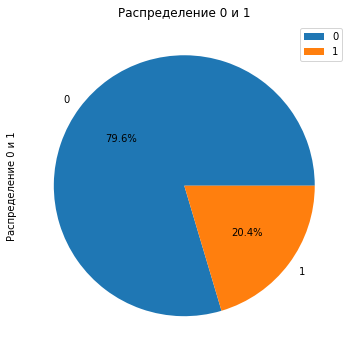

In [37]:
df_copy_join.groupby('exited').size().plot(kind='pie',
                                       title = "Распределение 0 и 1",
                                       label = "Распределение 0 и 1",
                                       autopct='%1.1f%%',
                                       figsize=(6, 6),
                                       legend='exited');

In [38]:
train_n, validate_e, test_t = np.split(df_copy_join.sample(frac=1, random_state=69), [int(.6*len(df_copy_join)), int(.8*len(df_copy_join))])

In [39]:
rat = len(train_n.loc[train_n['exited']==0])/len(train_n.loc[train_n['exited']==1])# отношение количества строк с 0 к 1 exited
rat = math.ceil(rat)  
rat

4

Соотношение классов 0 и 1

In [40]:
df_1 = train_n.loc[train_n['exited']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
train_n_upsampling = pd.concat([train_n.loc[train_n['exited']==0], df_1]).sample(frac=1)

Берем все данные с классом 1, продублируем его rat раз, присоединим к данным класса 0 продублированный класс 1 и перемещаем

In [41]:
train_n_upsampling.exited.value_counts()

1    4524
0    4323
Name: exited, dtype: int64

In [42]:
train_n_upsampling = shuffle(train_n_upsampling, random_state= 69)

Перемешиваем строки

In [43]:
features_train_upsampling = train_n_upsampling.drop(['exited'], axis=1)
target_train_upsampling = train_n_upsampling.exited

features_validate_upsampling = validate_e.drop(['exited'], axis=1)
target_validate_upsampling = validate_e.exited

features_test_upsampling = test_t.drop(['exited'], axis=1)
target_test_upsampling = test_t.exited

#### Применение метода upsampling на LogisticRegression

In [44]:
best_model = None
best_result = 0
best_c = 0
for c in np.arange(0.1, 10, 0.1):
    model = LogisticRegression(random_state=69, solver='liblinear', C=c)          
    model.fit(features_train_upsampling, target_train_upsampling)
    predicted_valid_d = model.predict(features_validate_upsampling) 
    result = f1_score(target_validate_upsampling, predicted_valid_d)
    
    if result > best_result:
        best_model = model
        best_result = result
        best_c = c

best_c

0.2

Лучший результат на C = 0.3

In [45]:
roc_auc_score(target_validate_upsampling, best_model.predict_proba(features_validate_upsampling)[:, 1])

0.7189872767844865

In [46]:
f1_score(target_validate_upsampling, best_model.predict(features_validate_upsampling))

0.4512298558100086

При сбалансировании классов методом "upsampling", результат F-1 и AUC-ROC в LogisticRegression явно подрасли

#### Применение метода upsampling на RandomForestClassifier

In [47]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 71, 10):
    for depth in range (1, 71):
        model = RandomForestClassifier(random_state=69, n_estimators=est,  max_depth=depth)
        model.fit(features_train_upsampling, target_train_upsampling)
        predicted_valid_d = model.predict(features_validate_upsampling)
        result = f1_score(target_validate_upsampling, predicted_valid_d)
        
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Наилучшая модель на валидационной выборке:", best_model, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", best_depth)


Наилучшая модель на валидационной выборке: RandomForestClassifier(max_depth=11, n_estimators=60, random_state=69) Количество деревьев: 60 Максимальная глубина: 11


In [48]:
f1_score(target_validate_upsampling, best_model.predict(features_validate_upsampling))

0.6133333333333333

In [50]:
roc_auc_score(target_validate_upsampling, best_model.predict_proba(features_validate_upsampling)[:, 1])

0.845687693557348

### Уменьшение выборки методом downsampling из библиотеки sklearn.utils

In [51]:
df_copy_join.exited.value_counts()

0    7237
1    1854
Name: exited, dtype: int64

In [52]:
train_downsampl, validate_downsampl, test_downsampl = np.split(df_copy_join.sample(frac=1, random_state=69), [int(.6*len(df_copy_join)), int(.8*len(df_copy_join))])

Разбиваем df в соотношении 60 / 20 / 20

In [53]:
exited_1 = train_downsampl[train_downsampl["exited"] == 1]
exited_0 = train_downsampl[train_downsampl["exited"] == 0]
exited_0.shape

(4323, 12)

Выбираем строки с 0 и 1 и записываем в соответствующие переменные

In [54]:
exited_1.shape

(1131, 12)

In [55]:
train_downsample = resample(exited_0,
             replace=True,
             n_samples=len(exited_1),
             random_state=69)

train_downsample.shape

(1131, 12)

Понижаем больший класс до кол-ва меньшего класса

In [56]:
train_downsample = pd.concat([train_downsample, exited_1])

train_downsample["exited"].value_counts()

0    1131
1    1131
Name: exited, dtype: int64

Объединяем 2 df с помощью concat

In [57]:
train_downsample = shuffle(train_downsample, random_state= 69)

Перемешиваем df

In [58]:
features_train_downsamp = train_downsample.drop(['exited'], axis=1)
target_train_downsamp = train_downsample.exited

features_validate_downsamp = validate_downsampl.drop(['exited'], axis=1)
target_validate_downsamp = validate_downsampl.exited

features_test_downsamp = test_downsampl.drop(['exited'], axis=1)
target_test_downsamp = test_downsampl.exited

#### Применение метода downsampling на LogisticRegression

In [59]:
best_model = None
best_result = 0
best_c = 0
for c in np.arange(0.1, 10, 0.1):
    model = LogisticRegression(random_state=69, solver='liblinear', C=c)          
    model.fit(features_train_downsamp, target_train_downsamp)
    predicted_valid_downsamp = model.predict(features_validate_downsamp) 
    result = f1_score(target_validate_downsamp, predicted_valid_downsamp)
    
    if result > best_result:
        best_model = model
        best_result = result
        best_c = c

best_c

0.7000000000000001

In [60]:
roc_auc_score(target_validate_downsamp, best_model.predict_proba(features_validate_downsamp)[:, 1])

0.7407262079170341

In [61]:
f1_score(target_validate_downsamp, best_model.predict(features_validate_downsamp))

0.472196900638104

#### Применение метода downsamp на RandomForestClassifier

In [62]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 71, 10):
    for depth in range (1, 71):
        model = RandomForestClassifier(random_state=69, n_estimators=est,  max_depth=depth)
        model.fit(features_train_downsamp, target_train_downsamp)
        predicted_valid_downsamp = model.predict(features_validate_downsamp)
        result = f1_score(target_validate_downsamp, predicted_valid_downsamp)
        
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Наилучшая модель на валидационной выборке:", best_model, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", best_depth)


Наилучшая модель на валидационной выборке: RandomForestClassifier(max_depth=6, n_estimators=60, random_state=69) Количество деревьев: 60 Максимальная глубина: 6


In [63]:
f1_score(target_validate_downsamp, best_model.predict(features_validate_downsamp))

0.5816326530612245

In [64]:
roc_auc_score(target_validate_downsamp, best_model.predict_proba(features_validate_downsamp)[:, 1])

0.8481336900258717

**Вывод**

Обработали дисбаланс разными способами, обучил модели, подобрал гиперпараметры, вывел метрики roc_auc и f1 

## Тестирование модели

#### Тестирование модели при применении метода downsamp на RandomForestClassifier

In [65]:
model = RandomForestClassifier(random_state=69, n_estimators=40,  max_depth=13)
model.fit(features_train_upsampling, target_train_upsampling)
predicted_valid_d = model.predict(features_test_upsampling)

In [66]:
f1_score_rfc_downsamp = f1_score(target_test_upsampling, predicted_valid_d)
f1_score_rfc_downsamp

0.6102635228848821

In [67]:
auc_roc_downsamp = roc_auc_score(target_test_upsampling, model.predict_proba(features_test_upsampling)[:, 1])
auc_roc_downsamp

0.8650689791091841

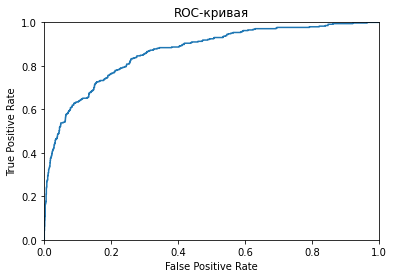

In [68]:
fpr, tpr, thresholds = roc_curve(target_test_upsampling, model.predict_proba(features_test_upsampling)[:, 1])

plt.figure()

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')

plt.show()

**Вывод**

Финальное тестирование произведено успешно ! :) Метрика f1 0.61

## Вывод

Проект мы начали с изучения данных, посмотрели содержимое df в нем 10,000 строк и 14 столбцов. Data Frame содержит float64(3 столбца), int64(8 столцов) и object(3 столбца). Обработали NaN, переименовали столбцы, привели их в надлежащий вид. Применили прямое кодирование к типам столбцов object с последующим удаляем некоторые столбцы, для избежания "дамми-ловушки". Провели  обучение модели на данных без балансировки, после, применили балансировку, а именно примененили параметр class_weight = 'balanced', увеличели выборку методом upsampling и уменьшили выборки методом downsampling из библиотеки sklearn. Вывели метрику  f1 и auc_roc. С изначально поставленной задачей справились, метрика f1 0.61.